Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:

________

#In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) to blackboard before the end of class. Be sure to save the notebook before uploading to blackboard.

**Distance Students**: please finish this assignment in 2 hours and 30 minutes. Turn in before next class per the instructions on blackboard.

________________________________________________________________________________________________________

##Running in the 'R' Ecosystem with magics

In [2]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

arules = importr('arules') # same as importing in R with the "library" command
arules_viz = importr('arulesViz') # visualize the different rules

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      2     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


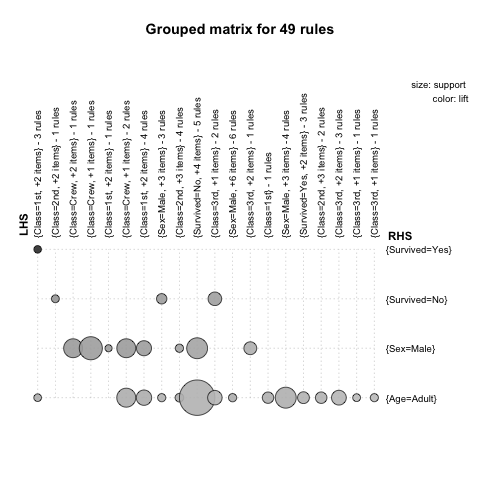

Arules run now from R, test complete


In [3]:
%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped")

print 'Arules run now from R, test complete'

##Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different. 

___
Enter your answer here:

*Double Click to Edit*


This is not typical transaction data because the attributes are nominals (not transactions). Therefore each transaction is of the same length and we are guaranteed that each transaction will have a value for each type of attribute. Therefore the possible combinations of items is smaller because of the mutual exclusivety (e.g., one transaction cannot be both 3rd class and 2nd class). 

It also means that the apriori algorithm will not take advantage of some of this exclusivety. It may try to generate itemsets that are impossible.
___

## Frequent Itemsets and Apriori
The in class assignment begins here. Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe

In [12]:
# Use rmagics to save the dataframe into pandas
#(R output)(python var) ( this is all R code)
%R -o df_from_R df_from_R <- titanic.raw

# now we have the exact same dataset as the one from R
# but it is now a pandas dataframe
print df_from_R.info()

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()
# df_from_R.to_csv('Rframe_as_pandas.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 1 to 2201
Data columns (total 4 columns):
Class       2201 non-null object
Sex         2201 non-null object
Age         2201 non-null object
Survived    2201 non-null object
dtypes: object(4)
memory usage: 86.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 5 columns):
Unnamed: 0    2201 non-null int64
Class         2201 non-null object
Sex           2201 non-null object
Age           2201 non-null object
Survived      2201 non-null object
dtypes: int64(1), object(4)
memory usage: 103.2+ KB


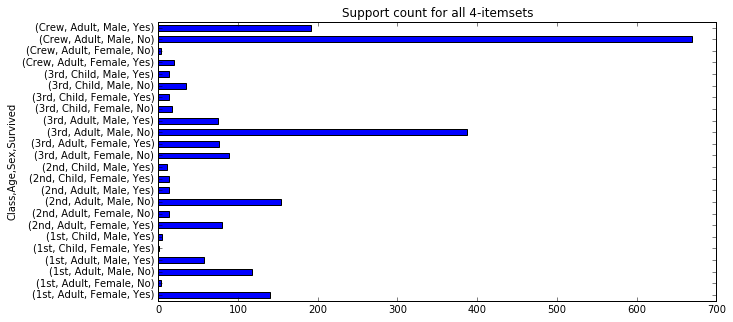

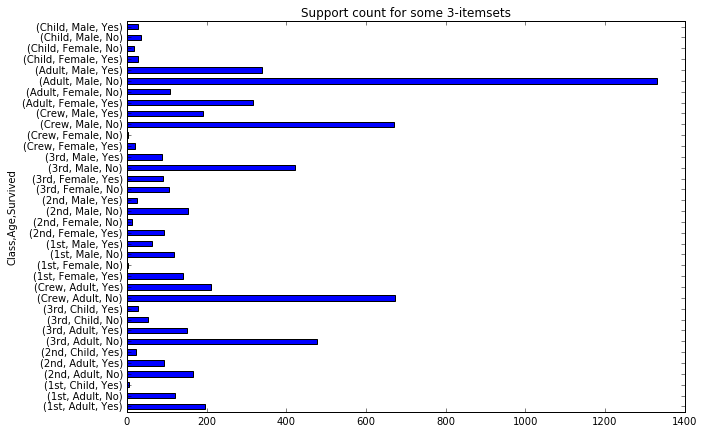

In [5]:
# Now lets plot the number of times each itemset occurs graphically
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

*Double Click to Edit*

The support count for {1, adult, yes} is $s\approx 197, \sigma=0.0895$

The support count for {1, adult, yes, female} is $s\approx 140, \sigma=0.0636$

confidence is about 71%

In [14]:
# Insert any calculations needed to answer the above question here
cnts = df_from_R.groupby(by=['Class','Age','Sex','Survived']).count()
print cnts.iloc[1]
num_XUY = cnts.iloc[1].values

cnts = df_from_R.groupby(by=['Class','Age','Survived']).count()
print cnts.iloc[1]
num_X = cnts.iloc[1].values

print float(num_XUY) / num_X

Unnamed: 0    140
Name: (1st, Adult, Female, Yes), dtype: int64
Unnamed: 0    197
Sex           197
Name: (1st, Adult, Yes), dtype: int64
[ 0.7106599  0.7106599]


___
___
**Question**: Using the support count graphs, what is the support count for a *minsup* threshold of 0.25? From the graphs, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

*Double Click to Edit*

Minsup is 550 which make the following itemsets frequent:
- {crew, adult, no} = 675 ish
- {crew, male, no}  = 675 ish
- {adult, male, no} = 1300 ish
- {adult, male, crew, no} = 675 ish

It is maximal because there are not any itemsets that are 5-itemsets, thereofore no superset can have a higher support count. 


In [24]:
# Insert any calculations needed to answer the above question here

sup = 0.25*2201
print sup, int(sup)

cnts = df_from_R.groupby(by=['Class','Age','Sex','Survived']).count()
print cnts[cnts>sup].dropna()

df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

tmp = pd.concat((countsA,countsB,countsC))
print tmp[tmp>sup]

550.25 550
                           Unnamed: 0
Class Age   Sex  Survived            
Crew  Adult Male No               670
Class  Age    Survived
Crew   Adult  No           673
       Male   No           670
Adult  Male   No          1329
dtype: int64


___

### Generating candidates 
Assume that the 3-itemset graph above contains all the possible 3-itemsets in the titanic dataset and their support count. **Exercise**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. 

___
Enter your answer here:

*Double Click to Edit*

Frequent 3-itemsets:
- {3rd, adult, no}
- {crew, adult, no}
- {adult, male, no}
- {3rd, male, no}
- {crew, male, no}
- {adult, female, yes}
- {adult, male, yes}
- {crew, adult, yes}

Possible 4-itemsets using apriori:
- {adult, male, crew, no}
- {3rd, adult, male, no}
- {crew, adult, male, yes} (okay, but pruned because assuming crew, adult, male  is not frequent)

___
<a id="arules"></a>
<a href="#top">Back to Top</a>
## Using the Arules Package to Interpret Data
Run the following R code to run the Apriori algorithm on the titanic dataset. 

**Exercise**: Change the parameters of the apriori algorithm in order to check your results from the previous question. That is, change the minlen, supp, and conf parameters so that it only displays 4-itemsets with minimum "support count" of 200. Do the itemsets from the resulting rules match with what you found in the previous questions? Should they? Why or why not?

In [ ]:
%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=200/2201, conf=0.01))
%R rules.sorted <- sort(rules, by="support")
%R inspect(rules.sorted)

___
Enter your answer here:

*Double Click to Edit*

They do match with the answers in the previous question, though they do not need to because we assumed everything not int the 3-itemset graph was infrequent. Because of the exclusivety of the dataset, thats okay however. 

There are only two frequent itemsets of length four, resulting in eight rules with confidence great enough to stay in the list.
___

##Using the Arules Viz Package 
Now run the following code to visualize the rules from the previous step. There are various parameters built into the visualization such as support, confidence, and a parameter known as "lift." Lift is a measure that ranks different rules using the equation 
$$ Lift = \frac{P(Y|X)}{P(Y)} = \frac{c(X\rightarrow Y)}{s(Y)} $$
In practice, there are many different measures that we use to rank the rules from a dataset, but, at the end of the day, a human evaluates which rules are most subjectively interesting. The arulesViz library allows many different types of interpretations for looking at lift and confidence together. The documentation is here:
http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf 

The styles of plot are "scatterplot", "two-key plot", "matrix", "matrix3D", "graph", "paracoord" or "grouped." Each provides a different view of the rules. Try at least three plots using the boilerplate code below (you just need to change the "method" parameter of the plot). After looking at the visualizations possible answer th following:

**Question**: Which rules are the most interesting according to Lift, according to confidence, and, lastly, according to you? Why?

In [ ]:
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped", measure = 'confidence', shading='lift')
%R plot(rules.sorted, method="matrix", measure = 'confidence', shading='lift')
%R plot(rules.sorted, method="paracoord", measure = 'confidence', shading='lift')

%R inspect(rules.sorted)

print 'The Graphic for rules grouped by lift and their support'

___
Enter your answer here:

*Double Click to Edit*

The rule with highest confidence and highest lift is 1st class female => survived. I would agree that this is one of the more interesting rules from the set. However, I think it is of the same caliber as {3rd class male} => not survived, which is the rule with the least confidence/lift. Therefore lift and confidence are not neccessarily in line with human intuition.
___


**Question**: Who is a lead author for the arules package and the arulesViz package? What University do they currently teach at?

http://cran.r-project.org/web/packages/arules/arules.pdf

http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf

In [ ]:
from IPython.display import HTML
HTML('<iframe src=http://michael.hahsler.net width=700 height=350></iframe>')

___
Enter your answer here:

*Double Click to Edit*

Dr. M. Hahsler, SMU
___



In [ ]:
from IPython.display import Image
Image(url='http://lyle.smu.edu/IDA/docs/IDA_team_watson_2014_plus.jpg')

________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook to blackboard** and please include **team member names** in the notebook submission.